In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

from torchvision import models
from visualization.modules import LayeredModule
from visualization.data import *
from visualization.image_proc import *
from visualization.interpret import get_gradients_for_sample, show_gradient_backprop

In [2]:
model = LayeredModule.from_alexnet(models.alexnet(pretrained=True), hook_to_activations=True)

In [3]:
original_img, name, target_class = get_example_data(0, img_path='../old_visual/input_images/')

In [4]:
prep_img = preprocess_image(original_img)

In [5]:
tuple(prep_img.shape[2:])

(224, 224)

In [6]:
prep_img.requires_grad

True

### Vanilla Backprop

In [7]:
gradients = get_gradients_for_sample(model, prep_img, target_class)

In [8]:
for key, grad in gradients.items():
    print(key, tuple(grad.shape))

input (1, 3, 224, 224)
features-conv-0 (1, 64, 55, 55)
features-relu-0 (1, 64, 55, 55)
features-pool-0 (1, 64, 27, 27)
features-conv-1 (1, 192, 27, 27)
features-relu-1 (1, 192, 27, 27)
features-pool-1 (1, 192, 13, 13)
features-conv-2 (1, 384, 13, 13)
features-relu-2 (1, 384, 13, 13)
features-conv-3 (1, 256, 13, 13)
features-relu-3 (1, 256, 13, 13)
features-conv-4 (1, 256, 13, 13)
features-relu-4 (1, 256, 13, 13)
features-pool-2 (1, 256, 6, 6)
avgpool-0 (1, 256, 6, 6)
flatten (1, 9216)
classifier-dropout-0 (1, 9216)
classifier-linear-0 (1, 4096)
classifier-relu-0 (1, 4096)
classifier-dropout-1 (1, 4096)
classifier-linear-1 (1, 4096)
classifier-relu-1 (1, 4096)
classifier-linear-2 (1, 1000)


In [9]:
vanilla_grads = gradients['input'].numpy()[0]

In [10]:
vanilla_grads.shape

(3, 224, 224)

In [11]:
vanilla_grads_color = normalize_to_range(vanilla_grads)

In [12]:
vanilla_grads_color.shape

(3, 224, 224)

In [13]:
vanilla_grads_gray = convert_to_grayscale(vanilla_grads)
vanilla_grads_gray.shape

(224, 224)

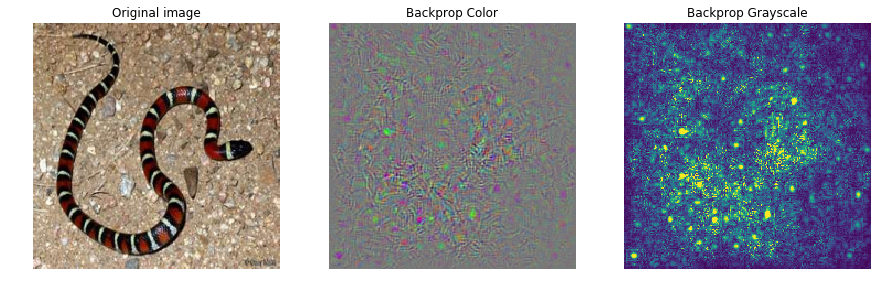

In [14]:
show_images([original_img, vanilla_grads_color, vanilla_grads_gray], ['Original image', 'Backprop Color', 'Backprop Grayscale']);

### Guided Backprop

In [15]:
gradients = get_gradients_for_sample(model, prep_img, target_class, guided=True)

In [16]:
vanilla_grads = gradients['input'].numpy()[0]

In [17]:
vanilla_grads.shape

(3, 224, 224)

In [18]:
vanilla_grads_color = normalize_to_range(vanilla_grads)

In [19]:
vanilla_grads_color.shape

(3, 224, 224)

In [20]:
vanilla_grads_gray = convert_to_grayscale(vanilla_grads)
vanilla_grads_gray.shape

(224, 224)

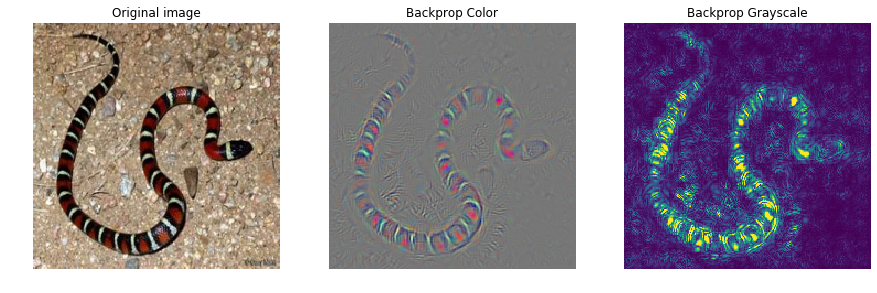

In [21]:
show_images([original_img, vanilla_grads_color, vanilla_grads_gray], ['Original image', 'Backprop Color', 'Backprop Grayscale']);

### For all images

In [22]:
def get_backprop(example_index, guided):
    original_img, name, target_class = get_example_data(example_index, img_path='../old_visual/input_images/')
    pretrained_model = models.alexnet(pretrained=True)
    # Vanilla backprop
    model = LayeredModule.from_alexnet(pretrained_model, hook_to_activations=True)
    # Generate and show gradients
    prep_img = preprocess_image(original_img)
    show_gradient_backprop(model, prep_img, target_class, guided)

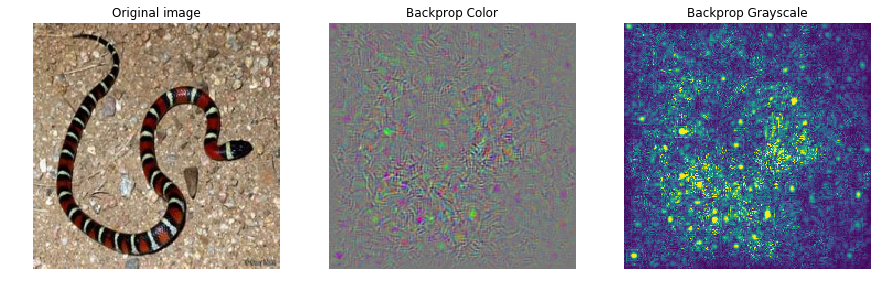

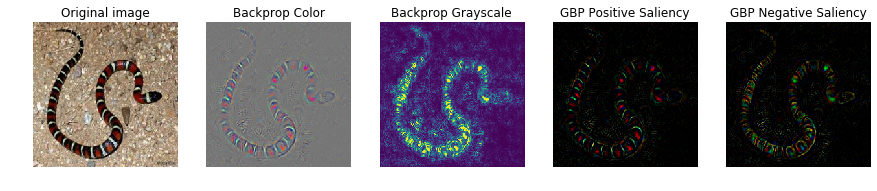

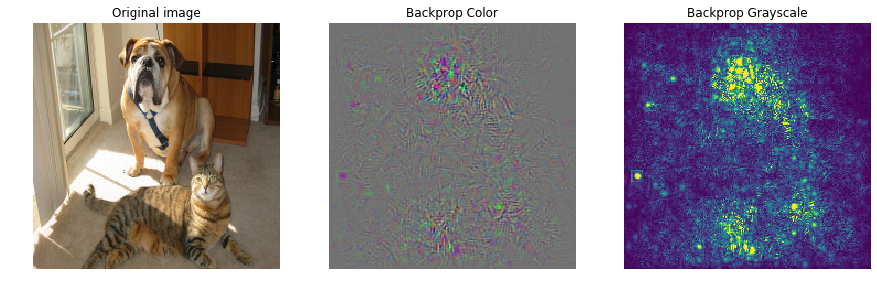

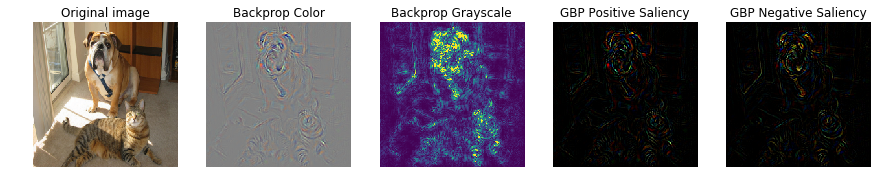

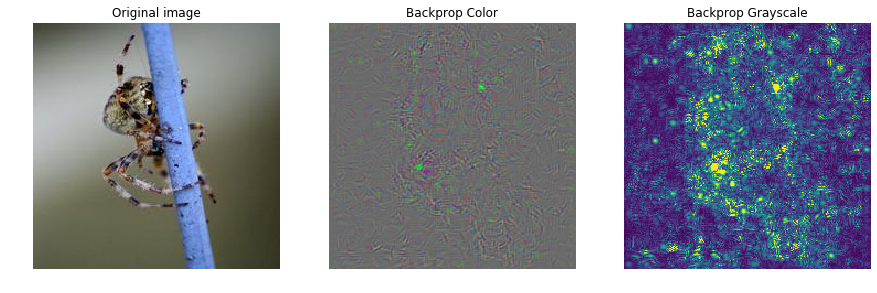

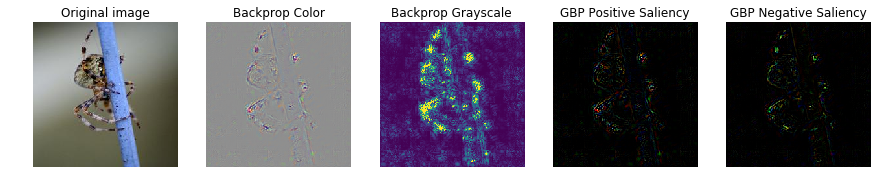

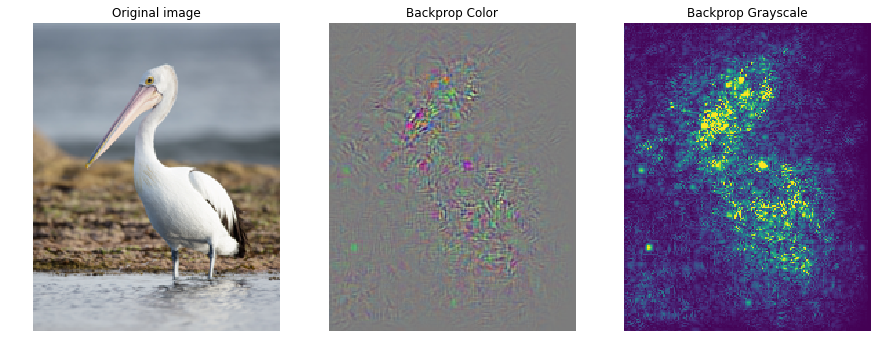

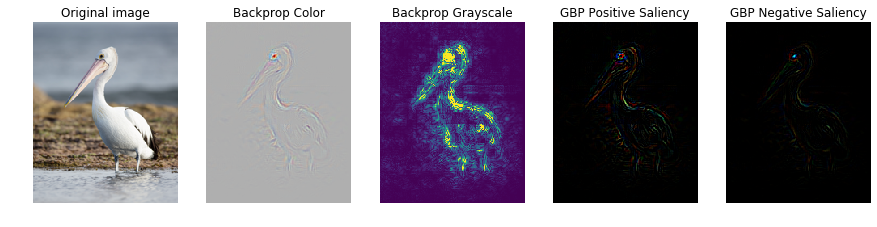

In [23]:
for idx in range(4):
    for guided in (False, True):
        get_backprop(idx, guided)